# Project work

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# import the dataset 

usecols = [
    'latitude', 'longitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population', 'households',
    'median_income', 'median_house_value'
]

In [3]:
house_df = pd.read_csv('housing.csv', usecols=usecols)
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [4]:
list(house_df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

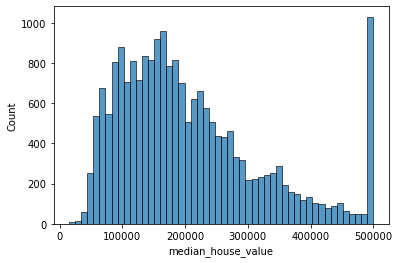

In [5]:
sns.histplot(house_df.median_house_value, bins=50)

In [6]:
house_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
n = len(house_df)

In [10]:
idx = np.arange(n)

In [11]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [12]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
# checking 

n, n_val + n_test + n_train

(20640, 20640)

In [14]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [15]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

In [16]:
len(house_df_test), len(house_df_val), len(house_df_train)

(4128, 4128, 12384)

In [17]:
# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [18]:
house_df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.63,34.11,35.0,3795.0,690.0,1521.0,653.0,5.8735,448100.0
1,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0
2,-120.78,38.74,28.0,4236.0,877.0,2008.0,881.0,2.1603,111300.0
3,-122.37,37.58,43.0,2506.0,432.0,967.0,428.0,4.7404,500001.0
4,-121.92,37.45,10.0,3937.0,1054.0,2032.0,1002.0,3.2617,252200.0


In [19]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

<AxesSubplot:ylabel='Count'>

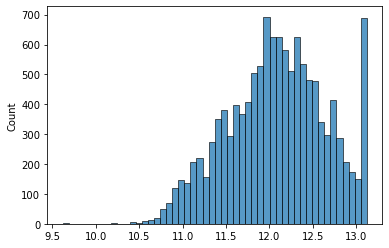

In [20]:
sns.histplot(y_train, bins=50)

In [21]:
house_df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.63,34.11,35.0,3795.0,690.0,1521.0,653.0,5.8735,448100.0
1,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0
2,-120.78,38.74,28.0,4236.0,877.0,2008.0,881.0,2.1603,111300.0
3,-122.37,37.58,43.0,2506.0,432.0,967.0,428.0,4.7404,500001.0
4,-121.92,37.45,10.0,3937.0,1054.0,2032.0,1002.0,3.2617,252200.0


In [22]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

## Option 1

Filling missing value with 0 

In [23]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [24]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

### Linear Regression

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Base Solution

In [26]:
def prepare_X(df):
    df_num = df[house_df_train_0.columns]
    X = df_num.values
    return X

In [27]:
X_train = prepare_X(house_df_train_0)

In [28]:
w_0, w = train_linear_regression(X_train, y_train)

In [29]:
y_pred = w_0 + X_train.dot(w)

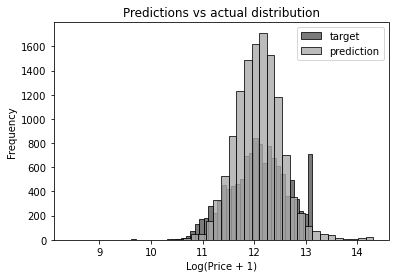

In [30]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [31]:
def rmse(y_actual, y_pred):
    error = y_pred - y_actual
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [32]:
rmse(y_train, y_pred)

0.3369621357945928

In [33]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)

In [34]:
round(rmse(y_val, y_pred), 2)

0.36

## Option 2 

filling missing values with mean of the column 

In [35]:
house_df_train_mean = house_df_train.copy()
house_df_val_mean = house_df_val.copy()
house_df_test_mean = house_df_test.copy()

In [36]:
house_df_train_mean.total_bedrooms.fillna(int(house_df_train_mean['total_bedrooms'].mean()), inplace=True)
house_df_val_mean.total_bedrooms.fillna(int(house_df_val_mean['total_bedrooms'].mean()), inplace=True)
house_df_test_mean.total_bedrooms.fillna(int(house_df_test_mean['total_bedrooms'].mean()), inplace=True)


### Linear Regression 2

Baseline

In [37]:
X_train = prepare_X(house_df_train_mean)

In [38]:
w_0, w = train_linear_regression(X_train, y_train)

In [39]:
y_pred = w_0 + X_train.dot(w)

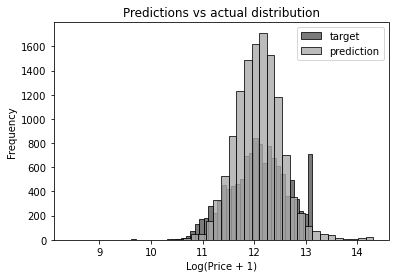

In [40]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [41]:
rmse(y_train, y_pred)

0.3369621357945928

In [42]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)

In [43]:
round(rmse(y_val, y_pred), 2)

0.36

## Training a regularized linear regression model 

In [44]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
X_train = prepare_X(house_df_train_0)

In [46]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)


In [47]:
X_train = prepare_X(house_df_train_0)
X_val = prepare_X(house_df_val_0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.35554061782145585
 1e-06 0.3555406124578044
0.0001 0.3555400818775534
 0.001 0.35553528430112563
  0.01 0.3554898149796936
   0.1 0.3552367398658503
     1 0.35723942628843786
     5 0.3612667917574572
    10 0.36233972737310954


# Splitting the dataset using different seedings 

Seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Seed 0**

In [48]:
np.random.seed(0)
np.random.shuffle(idx)

In [49]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [50]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [51]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [52]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [53]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [54]:
X_train = prepare_X(house_df_train_0)

In [55]:
w_0, w = train_linear_regression(X_train, y_train)

In [56]:
y_pred = w_0 + X_train.dot(w)

In [57]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.33258860023819137

**Seed 1**

In [58]:
np.random.seed(1)
np.random.shuffle(idx)

In [59]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [60]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [61]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [62]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [63]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [64]:
X_train = prepare_X(house_df_train_0)

In [65]:
w_0, w = train_linear_regression(X_train, y_train)

In [66]:
y_pred = w_0 + X_train.dot(w)

In [67]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3455742620842655

**Seed 2**

In [68]:
np.random.seed(2)
np.random.shuffle(idx)

In [69]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [70]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [71]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [72]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [73]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [74]:
X_train = prepare_X(house_df_train_0)

In [75]:
w_0, w = train_linear_regression(X_train, y_train)

In [76]:
y_pred = w_0 + X_train.dot(w)

In [77]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34133813028633475

**Seed 3**

In [78]:
np.random.seed(3)
np.random.shuffle(idx)

In [79]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [80]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [81]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [82]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [83]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [84]:
X_train = prepare_X(house_df_train_0)

In [85]:
w_0, w = train_linear_regression(X_train, y_train)

In [86]:
y_pred = w_0 + X_train.dot(w)

In [87]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3383592632015214

**Seed 4**

In [88]:
np.random.seed(4)
np.random.shuffle(idx)

In [89]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [90]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [91]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [92]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [93]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [94]:
X_train = prepare_X(house_df_train_0)

In [95]:
w_0, w = train_linear_regression(X_train, y_train)

In [96]:
y_pred = w_0 + X_train.dot(w)

In [97]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3391621960262387

**Seed 5**

In [98]:
np.random.seed(5)
np.random.shuffle(idx)

In [99]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [100]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [101]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [102]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [103]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [104]:
X_train = prepare_X(house_df_train_0)

In [105]:
w_0, w = train_linear_regression(X_train, y_train)

In [106]:
y_pred = w_0 + X_train.dot(w)

In [107]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34275495973311554

**Seed 6**

In [108]:
np.random.seed(6)
np.random.shuffle(idx)

In [109]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [110]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [111]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [112]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [113]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [114]:
X_train = prepare_X(house_df_train_0)

In [115]:
w_0, w = train_linear_regression(X_train, y_train)

In [116]:
y_pred = w_0 + X_train.dot(w)

In [117]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3430132885180559

**Seed 7**

In [118]:
np.random.seed(7)
np.random.shuffle(idx)

In [119]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [120]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [121]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [122]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [123]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [124]:
X_train = prepare_X(house_df_train_0)

In [125]:
w_0, w = train_linear_regression(X_train, y_train)

In [126]:
y_pred = w_0 + X_train.dot(w)

In [127]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34391125114790627

**Seed 8** 

In [128]:
np.random.seed(8)
np.random.shuffle(idx)

In [129]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [130]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [131]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [132]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [133]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [134]:
X_train = prepare_X(house_df_train_0)

In [135]:
w_0, w = train_linear_regression(X_train, y_train)

In [136]:
y_pred = w_0 + X_train.dot(w)

In [137]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3357403980502115

**Seed 9**

In [138]:
np.random.seed(9)
np.random.shuffle(idx)

In [139]:
house_df_val = house_df.iloc[idx[:n_val]]
house_df_test = house_df.iloc[idx[n_val:n_val+n_test]]
house_df_train = house_df.iloc[idx[n_val+n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_val = house_df_val.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [140]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_val = np.log1p(house_df_val.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [141]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_val['median_house_value']
del house_df_test['median_house_value']

In [142]:
house_df_train_0 = house_df_train.copy()
house_df_val_0 = house_df_val.copy()
house_df_test_0 = house_df_test.copy()

In [143]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_val_0['total_bedrooms'] = house_df_val_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [144]:
X_train = prepare_X(house_df_train_0)

In [145]:
w_0, w = train_linear_regression(X_train, y_train)

In [146]:
y_pred = w_0 + X_train.dot(w)

In [147]:
X_val = prepare_X(house_df_val_0)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34694806615650997

`computing the standard deviation of all the rmse score of each seed`

In [148]:
std = np.std([
    0.33258860023819137, 0.3455742620842655, 0.34133813028633475, 0.3383592632015214, 
    0.3391621960262387, 0.34275495973311554, 0.3430132885180559, 0.34391125114790627,
    0.3357403980502115, 0.34694806615650997    
])

In [149]:
round(std, 3)

0.004

# Testing with seed 9 

In [150]:
np.random.seed(9)
np.random.shuffle(idx)

In [151]:
house_df_test = house_df.iloc[idx[:n_test]]
house_df_train = house_df.iloc[idx[n_test:]]

# resetting the indexes of the splitted data 

house_df_train = house_df_train.reset_index(drop=True)
house_df_test = house_df_test.reset_index(drop=True)

In [152]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(house_df_train.median_house_value.values)
y_test = np.log1p(house_df_test.median_house_value.values)

In [153]:
# deleting the msrp column from the splitted dataset

del house_df_train['median_house_value']
del house_df_test['median_house_value']

In [154]:
house_df_train_0 = house_df_train.copy()
house_df_test_0 = house_df_test.copy()

In [155]:
house_df_train_0['total_bedrooms'] = house_df_train_0.total_bedrooms.fillna(0)
house_df_test_0['total_bedrooms'] = house_df_test_0.total_bedrooms.fillna(0)

In [156]:
X_train = prepare_X(house_df_train_0)

In [157]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

In [158]:
X_test = prepare_X(house_df_test_0)

In [159]:
y_pred = w_0 + X_test.dot(w)

In [160]:
rmse(y_test, y_pred)

0.3327965460035701